In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [1]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_road_signs'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_road_signs


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')
signs = pd.read_csv('data/signnames.csv')

In [4]:
x_train, y_train, x_test, y_test = train['features'], train['labels'], test['features'], test['labels']

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((34799, 32, 32, 3), (34799,), (4410, 32, 32, 3), (4410,))

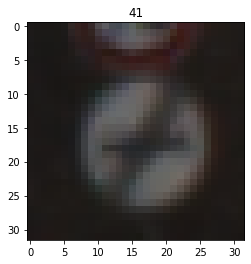

In [5]:
plt.imshow(x_train[0])
plt.title(y_train[0]);

In [6]:
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [7]:
len(np.unique(y_train))

43

In [8]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [10]:
y_train.shape, y_test.shape

((34799, 43), (4410, 43))

In [0]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [12]:
model = Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape= input_shape ),
                    Flatten(),
                    Dense(num_classes, activation='softmax')
                    ])
# model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train, y_train)

1088/1088 [==============================] - 4s 3ms/step - loss: 11.2598 - accuracy: 0.7964


In [0]:
def get_cnn_model(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape= input_shape ),
                    Flatten(),
                    Dense(num_classes, activation='softmax')
                    ])
# model.summary()
def train_model(model, x_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  log_dir = os.path.join('logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

  model.fit(
      x_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs= params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (x_train, y_train)),
      callbacks = [tensorboard_callback]
      )
  
  return model

In [16]:
model = get_cnn_model(input_shape, num_classes)
model_trained = train_model(model, x_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 31.8768 - accuracy: 0.7097 - val_loss: 0.2405 - val_accuracy: 0.9445
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2294 - accuracy: 0.9457 - val_loss: 0.1511 - val_accuracy: 0.9678
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1570 - accuracy: 0.9635 - val_loss: 0.1180 - val_accuracy: 0.9694
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1352 - accuracy: 0.9705 - val_loss: 0.1362 - val_accuracy: 0.9709
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1009 - accuracy: 0.9761 - val_loss: 0.0776 - val_accuracy: 0.9831


In [22]:
y_pred_prob = model_trained.predict(x_test)
y_pred_prob

array([[1.5226383e-06, 9.0117902e-03, 3.4767114e-02, ..., 1.5835786e-08,
        6.8295840e-04, 2.5152015e-03],
       [3.3479597e-07, 2.4367892e-03, 8.3053917e-02, ..., 9.4946550e-08,
        1.0106474e-04, 1.8082563e-03],
       [4.0154220e-05, 2.4478078e-02, 7.9206809e-02, ..., 1.3524605e-07,
        4.5486642e-03, 4.8231799e-03],
       ...,
       [4.4374363e-03, 3.1116692e-02, 3.4428407e-03, ..., 6.0050847e-04,
        1.3158208e-02, 1.5955664e-02],
       [4.4409753e-05, 1.2182430e-02, 6.2708179e-03, ..., 4.8669982e-03,
        1.2062473e-02, 4.9207169e-03],
       [1.0633386e-04, 1.2019014e-02, 1.6523559e-02, ..., 1.3997819e-03,
        5.4760394e-03, 4.6607563e-03]], dtype=float32)

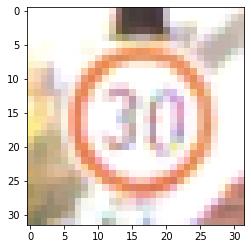

In [23]:
plt.imshow(x_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [25]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (30km/h)'

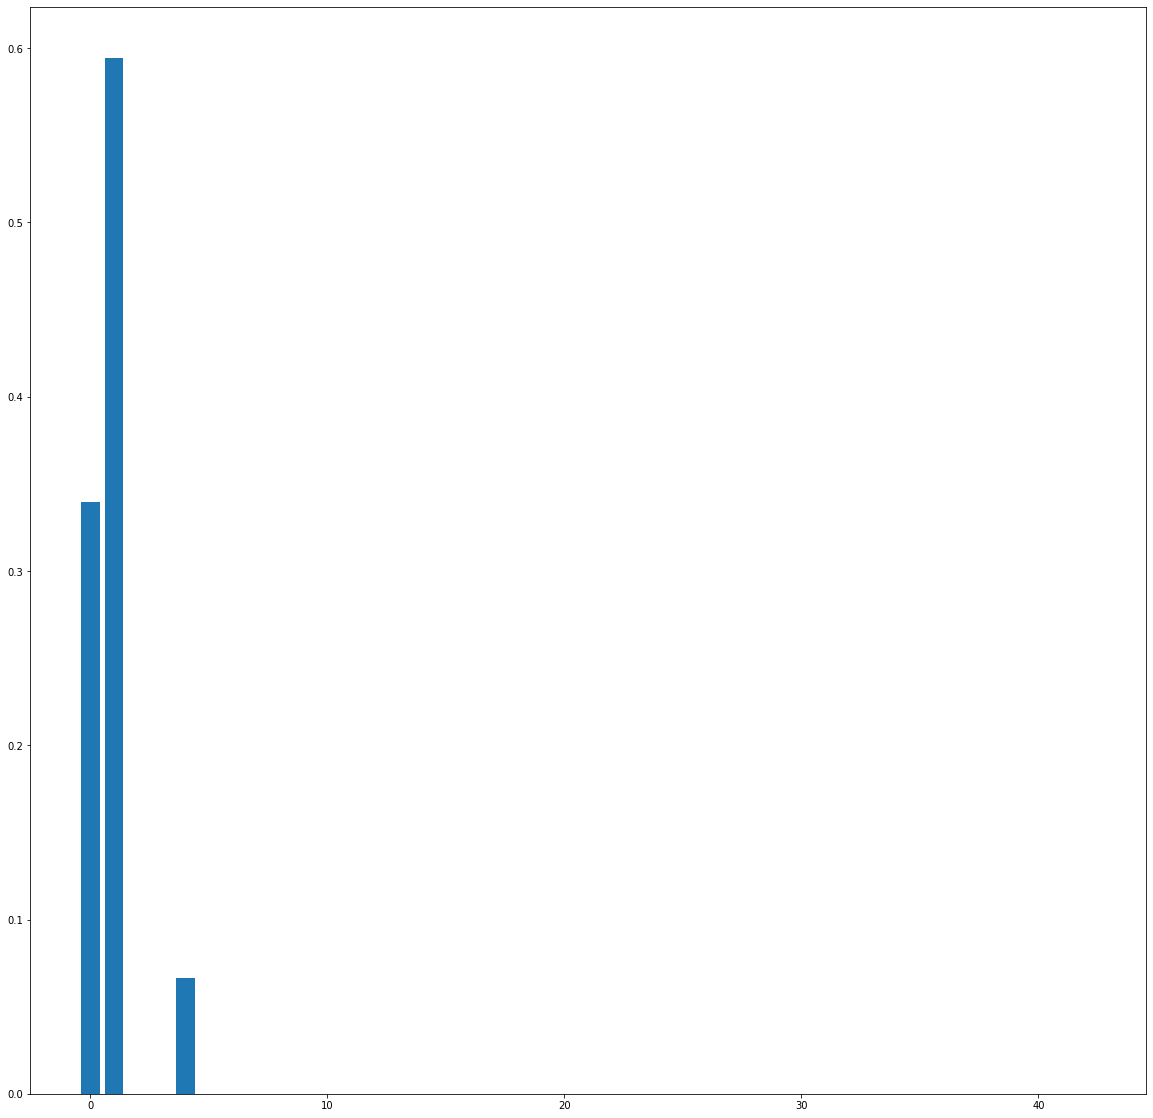

In [36]:
labels_dict_list =labels_dict.values()
plt.figure(figsize=(20,20))
plt.bar(range(43), y_pred_prob[400]);

In [0]:
def predict(model_trained, x_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis =1)

  y_pred_prob = model_trained.predict(x_test)
  y_pred = np.argmax(y_pred_prob, axis = 1)
  return scoring(y_test_norm, y_pred)

In [40]:
predict(model_trained, x_test, y_test)

0.8095238095238095

In [43]:
def get_cnn_model(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= input_shape ),
                    MaxPool2D(),
                    Dropout(0.3),

                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),                     

                    Flatten(),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax')

                    ])

def train_and_predict(model):
  model_trained = train_model(model, x_train, y_train)
  return predict(model_trained, x_test, y_test)

train_and_predict(get_cnn_model(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 4.7942 - accuracy: 0.3879 - val_loss: 0.8172 - val_accuracy: 0.7894
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.9087 - accuracy: 0.7347 - val_loss: 0.3269 - val_accuracy: 0.9279
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5042 - accuracy: 0.8516 - val_loss: 0.1545 - val_accuracy: 0.9689
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3460 - accuracy: 0.8965 - val_loss: 0.0790 - val_accuracy: 0.9827
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2610 - accuracy: 0.9232 - val_loss: 0.0568 - val_accuracy: 0.9897


0.936734693877551

In [44]:
def get_cnn_model_v3(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= input_shape ),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),

                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),                     

                    Flatten(),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax')

                    ])

def train_and_predict(model):
  model_trained = train_model(model, x_train, y_train)
  return predict(model_trained, x_test, y_test)

train_and_predict(get_cnn_model_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.0490 - accuracy: 0.5634 - val_loss: 0.3563 - val_accuracy: 0.9025
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4526 - accuracy: 0.8681 - val_loss: 0.1084 - val_accuracy: 0.9710
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2485 - accuracy: 0.9263 - val_loss: 0.0507 - val_accuracy: 0.9858
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1648 - accuracy: 0.9509 - val_loss: 0.0455 - val_accuracy: 0.9883
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1385 - accuracy: 0.9589 - val_loss: 0.0234 - val_accuracy: 0.9940


0.9709750566893424

In [48]:
def get_cnn_model_v4(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= input_shape ),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(),
                    Dropout(0.3),

                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),      

                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),                

                    Flatten(),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax')

                    ])

def train_and_predict(model):
  model_trained = train_model(model, x_train, y_train)
  return predict(model_trained, x_test, y_test)

train_and_predict(get_cnn_model_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.6309 - accuracy: 0.2989 - val_loss: 0.9773 - val_accuracy: 0.7180
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.7828 - accuracy: 0.7587 - val_loss: 0.1935 - val_accuracy: 0.9466
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3336 - accuracy: 0.9011 - val_loss: 0.1011 - val_accuracy: 0.9714
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2171 - accuracy: 0.9370 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1644 - accuracy: 0.9516 - val_loss: 0.0296 - val_accuracy: 0.9920


0.9700680272108844

In [53]:
def get_cnn_model_v5(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= input_shape ),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(),
                    Dropout(0.3),

                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),      

                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),                

                    Flatten(),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(1024, activation='relu'),
                    Dropout(0.3),

                    Dense(num_classes, activation='softmax')

                    ])

def train_and_predict(model):
  model_trained = train_model(model, x_train, y_train)
  return predict(model_trained, x_test, y_test)

train_and_predict(get_cnn_model_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.3202 - accuracy: 0.3507 - val_loss: 0.7936 - val_accuracy: 0.7614
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.6687 - accuracy: 0.7901 - val_loss: 0.1784 - val_accuracy: 0.9488
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.3320 - accuracy: 0.8972 - val_loss: 0.0741 - val_accuracy: 0.9788
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2235 - accuracy: 0.9315 - val_loss: 0.0392 - val_accuracy: 0.9890
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1768 - accuracy: 0.9483 - val_loss: 0.0384 - val_accuracy: 0.9891


0.9612244897959183

In [57]:
x_train_gray = color.rgb2gray(x_train)
x_test_gray = color.rgb2gray(x_test)
x_train_gray= x_train_gray.reshape(-1,32,32,1)
x_test_gray= x_test_gray.reshape(-1,32,32,1)
x_train_gray.shape

(34799, 32, 32, 1)

In [58]:
model = get_cnn_model_v5((32,32,1), num_classes)
model_trained= train_model(model, x_train_gray, y_train)
predict(model_trained, x_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.5577 - accuracy: 0.2810 - val_loss: 0.7490 - val_accuracy: 0.7500
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.6272 - accuracy: 0.7956 - val_loss: 0.1727 - val_accuracy: 0.9472
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2825 - accuracy: 0.9099 - val_loss: 0.0699 - val_accuracy: 0.9805
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1814 - accuracy: 0.9425 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1329 - accuracy: 0.9576 - val_loss: 0.0309 - val_accuracy: 0.9905


0.9662131519274376

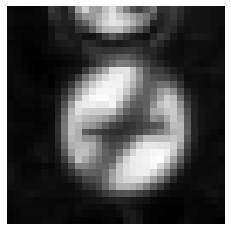

In [63]:
plt.imshow(color.rgb2gray(x_train[0]), cmap='gray');
plt.axis('off');